<a href="https://colab.research.google.com/github/dasunkasthury/DL_num_recog/blob/Iris_recognition/FaceEmotionRecog_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 135x4PObWqMhGlzDSFipiZnjELIpJ8lnm
!mkdir data
!unzip '/content/Emotion_data.zip' -d '/content/data/'
!rm -r Emotion_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/sad/Training_65242339.jpg  
  inflating: /content/data/train/sad/Training_65267116.jpg  
  inflating: /content/data/train/sad/Training_65275626.jpg  
  inflating: /content/data/train/sad/Training_6529266.jpg  
  inflating: /content/data/train/sad/Training_65329617.jpg  
  inflating: /content/data/train/sad/Training_65338712.jpg  
  inflating: /content/data/train/sad/Training_65338797.jpg  
  inflating: /content/data/train/sad/Training_65387162.jpg  
  inflating: /content/data/train/sad/Training_65404494.jpg  
  inflating: /content/data/train/sad/Training_65426218.jpg  
  inflating: /content/data/train/sad/Training_65430136.jpg  
  inflating: /content/data/train/sad/Training_65437377.jpg  
  inflating: /content/data/train/sad/Training_6545735.jpg  
  inflating: /content/data/train/sad/Training_65463385.jpg  
  inflating: /content/data/train/sad/Training_65473985.jpg  
  inflating: /content/data/train/sad

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import matplotlib as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import json

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
train_images = tf.data.Dataset.list_files('/content/data/train/angry/*.jpg', shuffle=False) # this will get all the jpg images inside the folder
train_images = train_images.map(load_image) # this will call the given func to all the images
train_images = train_images.map(lambda x: tf.image.resize(x, (250,250))) # this will resize the imge to gigen size
train_images = train_images.map(lambda x: x/255)

(250, 250, 1)

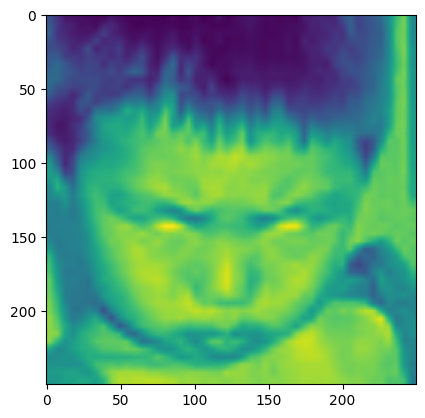

In [ ]:
#train_images.as_numpy_iterator().next() # this will print the image in numbers
plt.imshow(train_images.as_numpy_iterator().next()) # to plot the image
train_images.as_numpy_iterator().next().shape # to get the size of the image


In [ ]:
test_images = tf.data.Dataset.list_files('/content/data/test/angry/*.jpg', shuffle=False) # this will get all the jpg images inside the folder
test_images = test_images.map(load_image) # this will call the given func to all the images
test_images = test_images.map(lambda x: tf.image.resize(x, (250,250))) # this will resize the imge to gigen size
test_images = test_images.map(lambda x: x/255)

(250, 250, 1)

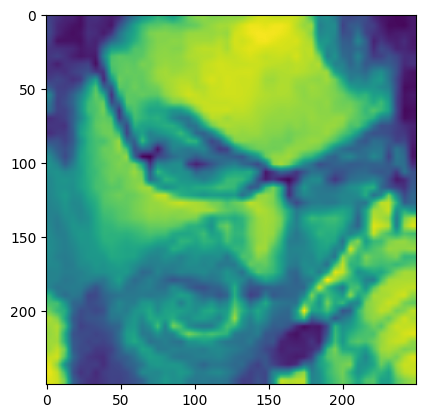

In [ ]:
#train_images.as_numpy_iterator().next() # this will print the image in numbers
plt.imshow(test_images.as_numpy_iterator().next()) # to plot the image
test_images.as_numpy_iterator().next().shape # to get the size of the image

In [ ]:
 data_gen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, rescale=1./255, validation_split=0.2)
path_to_data = '/content/data/train'

training_set = data_gen.flow_from_directory(path_to_data,(128,128),color_mode='grayscale', subset="training")
testing_set = data_gen.flow_from_directory(path_to_data,(128,128),color_mode='grayscale', subset="validation")

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [ ]:
print(training_set.class_indices)
print(training_set.batch_size)
labels = ["angry","disgust","fear","happy","neutral","sad","surprise"]

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
32


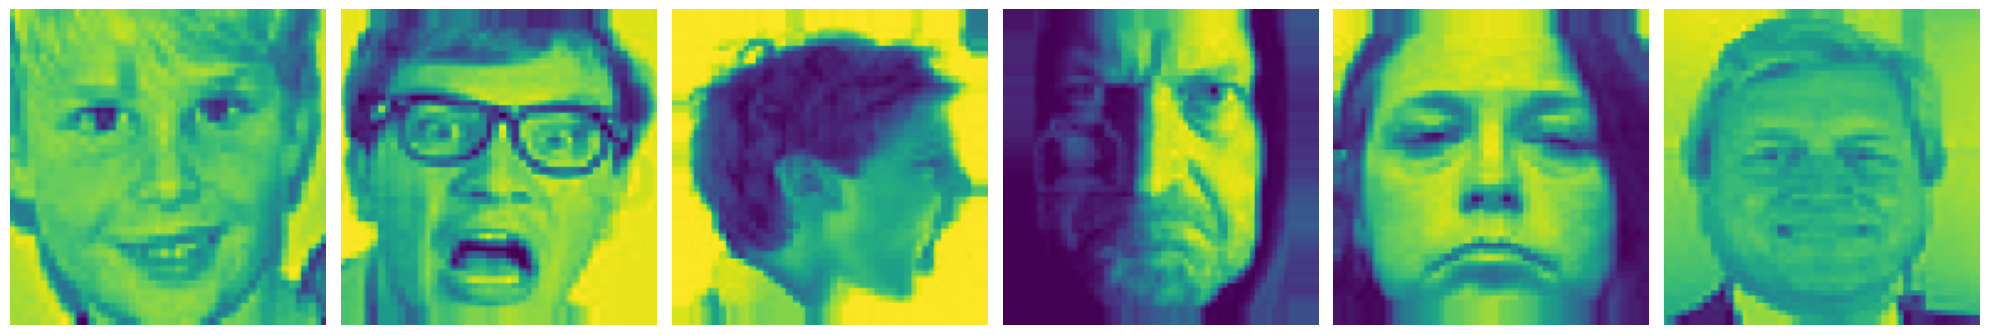

In [ ]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 6, figsize=(20,20))
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
training_images, _ = next(training_set)
plotImages(training_images[:6])

In [ ]:
# initialising the CNN
face_recognition_model = Sequential()

# convolution to extract features from images
face_recognition_model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
face_recognition_model.add(Conv2D(64, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))
face_recognition_model.add(Conv2D(128, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))
face_recognition_model.add(Conv2D(256, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
face_recognition_model.add(Flatten())
face_recognition_model.add(Dense(units = 1024, activation = 'relu'))
face_recognition_model.add(Dense(units = 7, activation = 'softmax'))

# compiling the CNN
face_recognition_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
face_recognition_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,833,223 (37.51 MB)

 Trainable params: 9,833,223 (37.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = face_recognition_model.fit(training_set, epochs=15, validation_data=testing_set, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.2802 - loss: 1.7580 - val_accuracy: 0.4114 - val_loss: 1.5355
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 74s 102ms/step - accuracy: 0.4294 - loss: 1.4731 - val_accuracy: 0.4658 - val_loss: 1.3893
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.5007 - loss: 1.3063 - val_accuracy: 0.5025 - val_loss: 1.3051
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 91s 99ms/step - accuracy: 0.5478 - loss: 1.1965 - val_accuracy: 0.5346 - val_loss: 1.2210
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 72s 99ms/step - accuracy: 0.5909 - loss: 1.0915 - val_accuracy: 0.5330 - val_loss: 1.2432
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 108ms/step - accuracy: 0.6222 - loss: 0.9975 - val_accuracy: 0.5494 - val_loss: 1.2025
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 76s 105ms/step - accuracy: 0.6787 - loss: 0.8828 - val_accuracy: 0.5529 - val_loss: 1.2141
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 77s 106ms/step - accuracy: 0.7186 - loss: 0.7759 - val_a

In [ ]:
face_recognition_model.save('/content/emotion_recog_model.keras')
face_recognition_model.save_weights('/content/emotion_recog_model.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
sad


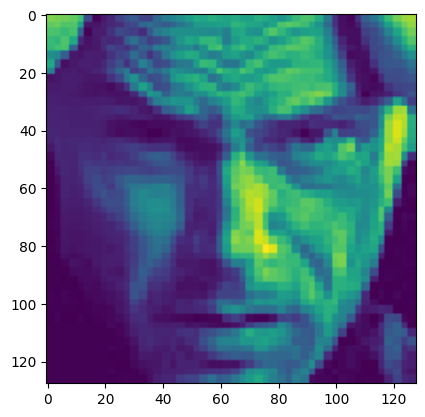

In [ ]:
testing_image = image.load_img('/content/data/test/fear/PrivateTest_10254684.jpg', color_mode='grayscale', target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
testing_image = np.expand_dims(testing_image, axis=0)


#print(testing_image.shape)

prediction_result = face_recognition_model.predict(testing_image)

print(labels[np.argmax(prediction_result)])
